# Labour Portfolio Shave

### Input Variables:

$\mathbb{L}$ Labour Portfolios as a Matrix   
$\mathbb{F}$ Production  
  
$M_F$ Maximum Production a Portfolio can have (Recommended to be above the maximum Demand in the Economy)

### Output Variables:

$\mathbb{L}$ New Reduced Labour Portfolios as a Matrix  

## Function:

As of: 28/04/2015

In [13]:
function Shave(L::Array{Any,1},F::Array{Float64,1},M_F::Float64)
    
    """Reduce the number of Portfolio by deleting 
    those which are suboptimal due to their production 
    being above the Maximum Demand. (Array Method)

    Parameters
    ----------
    L  : Labour Portfolio
    F  : Production
    M_D: Maximum Production a Portfolio can have 
    (Recommended to be above the maximum Demand in the Economy)
    
    Parameters
    ----------
    L : New Reduced Labour Portfolios
    """
    
    L=L[reshape([L...],length(L[1]),length(L))'*F.<=M_F];       # 100%
    
    return L
    
end

Shave (generic function with 1 method)

In [14]:
148/262

0.5648854961832062

## Growing Size

$G$

In [15]:
import LabourDP

N=3;
M_D=9.;
F_G=1.;
N_G=10;

F_0=0.8;
F_G=1.0;
F̂=1.2;
Ĝ=2;

## Time

Max Size and Sample Size

In [16]:
Ms=10;
Ss=1;

### Test

In [17]:
# Warm Up Run
G=5;
f=LabourDP.fPort(G);
Labour=LabourDP.LabourPortfolio(G,N,N_G,f);
F=LabourDP.Production(G,F_0,F_G,F̂,Ĝ);
Shave(Labour,F,10.);#

t=[1.0:Ms-2];
b=[1.0:Ss];

for i=1:Ms-2
    
    for j=1:Ss
        
        G=i+2;
        f=LabourDP.fPort(G);
        Labour=LabourDP.LabourPortfolio(G,N,N_G,f);
        F=LabourDP.Production(G,F_0,F_G,F̂,Ĝ);
        a=@elapsed Shave(Labour,F,10.)
        b[j]=a;
        
    end
    
    t[i]=minimum(b);
    
end

### Plot Result

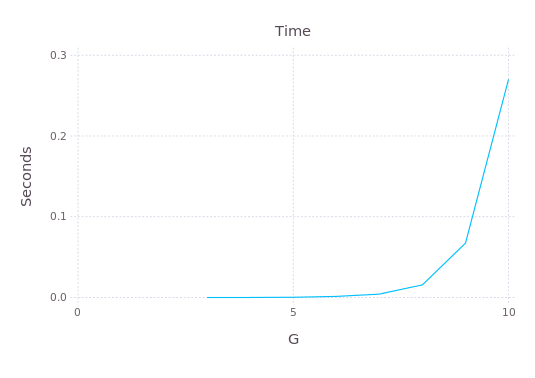

In [18]:
using Gadfly

plot(x=[3:Ms], y=t,Guide.xlabel("G"),Guide.ylabel("Seconds"),Guide.title("Time"), Geom.line)

## Memory

Max Size and Sample Size

In [28]:
Ms=10;
Ss=1;

### Test

In [29]:
# Warm Up Run
G=5;
f=LabourDP.fPort(G);
Labour=LabourDP.LabourPortfolio(G,N,N_G,f);
F=LabourDP.Production(G,F_0,F_G,F̂,Ĝ);
Shave(Labour,F,10.);#

t=[1.0:Ms-2];
b=[1.0:Ss];

for i=1:Ms-2
    
    for j=1:Ss
        
        G=i+2;
        f=LabourDP.fPort(G);
        Labour=LabourDP.LabourPortfolio(G,N,N_G,f);
        F=LabourDP.Production(G,F_0,F_G,F̂,Ĝ);
        a=@allocated Shave(Labour,F,10.)
        b[j]=a/10^6.0;
        
    end
    
    t[i]=minimum(b);
    
end

### Plot Result

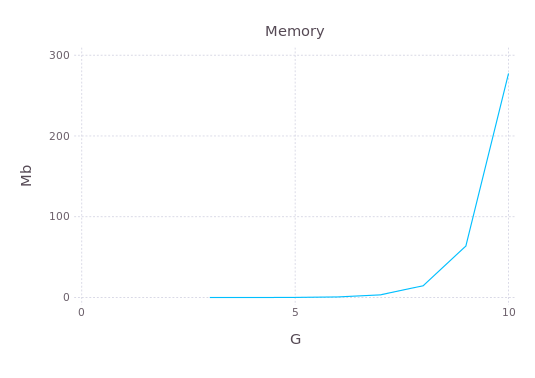

In [30]:
plot(x=[3:Ms], y=t,Guide.xlabel("G"),Guide.ylabel("Mb"),Guide.title("Memory"), Geom.line)

## Profile

In [22]:
N=3;
G=5;
M_D=9.;
F_G=1.;
N_G=10;

F_0=0.8;
F_G=1.0;
F̂=1.2;
Ĝ=2;

f=LabourDP.fPort(G);
Labour=LabourDP.LabourPortfolio(G,N,N_G,f);
F=LabourDP.Production(G,F_0,F_G,F̂,Ĝ);

Sample Size

In [26]:
Rep=1000;

In [27]:
Profile.clear()
@profile (for i=1:Rep;Shave(Labour,F,10.);end)
Profile.print()

499 task.jl; anonymous; line: 340
 499 .../IJulia/src/IJulia.jl; eventloop; line: 123
  499 ...rc/execute_request.jl; execute_request_0x535c5df2; line: 160
   499 loading.jl; include_string; line: 97
    499 profile.jl; anonymous; line: 2
     499 In[13]; Shave; line: 19
      2   abstractarray.jl; reshape; line: 127
       1 array.jl; reshape; line: 102
      234 array.jl; getindex; line: 298
       2   array.jl; getindex_bool_1d; line: 286
        2 ./bitarray.jl; countnz; line: 1239
       41  array.jl; getindex_bool_1d; line: 287
       8   array.jl; getindex_bool_1d; line: 290
        7 ./bitarray.jl; getindex; line: 350
       182 array.jl; getindex_bool_1d; line: 291
        1 base.jl; setindex!; line: 177
       1   array.jl; getindex_bool_1d; line: 292
      1   array.jl; vcat; line: 998
      3   array.jl; vcat; line: 1000
      41  array.jl; vcat; line: 1010
      4   broadcast.jl; .<=; line: 384
       2 ./bitarray.jl; BitArray; line: 26
      15  broadcast.jl; .<=; line: 3